## Problem Statement

This tutorial takes a practical and coding-focused approach. We'll define the terms _machine learning_ and _linear regression_ in the context of a problem, and later generalize their definitions. We'll work through a typical machine learning problem step-by-step:


> **QUESTION**: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, **you're tasked with creating an automated system to estimate the annual medical expenditure for new customers**, using information such as their age, sex, BMI, children, smoking habits and region of residence. 
>
> Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.
> 
> You're given a [CSV file](https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv) containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers. 
> <img src="https://i.imgur.com/87Uw0aG.png" width="480">
>
> Dataset source: https://github.com/stedy/Machine-Learning-with-R-datasets


**EXERCISE**: Before proceeding further, take a moment to think about how can approach this problem. List five or more ideas that come to your mind below:
 
 1. ???
 2. ???
 3. ???
 4. ???
 5. ???


## Downloading the Data<br>
To begin, let's download the data using the  **urlretrieve** from  **urllib.request.**

In [1]:
medical_charges_url='https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [2]:
from urllib.request import urlretrieve

In [3]:
urlretrieve(medical_charges_url,'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x24fc8239280>)

In [4]:
import pandas as pd

In [5]:
medical_df=pd.read_csv('medical.csv')

In [6]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
!pip install jovian --quiet

In [10]:
import jovian

<IPython.core.display.Javascript object>

In [11]:
jovian.commit(project="linear-regression-with-scikit-learn")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"


## Explarotary Analysis and Visualization

In [12]:
!pip install plotly --quiet
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [13]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

## Age

In [14]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [15]:
fig=px.histogram(medical_df,x='age',marginal='box',nbins=47,title='distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

## BMI

In [16]:
fig=px.histogram(medical_df,x='bmi',marginal='box',color_discrete_sequence=['red'],title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

## Charges

In [17]:
fig=px.histogram(medical_df,x='charges',marginal='box',color='smoker',color_discrete_sequence=['green','grey'],
title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

We can make the following obeservations from the above graph:
- For most customers, the annual medical charges are under $10000. Only a small fractionof cutomer have higher medical expenses, possibly due to accidents,major illness and genetic disease. The distribution follows "power law".
- There is a significant difference in medical expenses between smokers and non-smokers.While the median for non-smokers is $7300 the median for smokers is close to $35000.

## Sex

In [18]:
fig=px.histogram(medical_df,x='charges',marginal='box',color='sex',color_discrete_sequence=['green','grey'],
title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

## Smoker

In [19]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [20]:
px.histogram(medical_df,x='smoker',color='sex',title='Smoker')

## Age and Charges

In [21]:
fig=px.scatter(medical_df,x='age',y='charges',color='smoker',opacity=0.8,hover_data=['sex'],title='Age vs,. Charges')
fig.update_traces(marker_size=5)
fig.show()


## BMI vs Charges

In [22]:
fig=px.scatter(medical_df,x='bmi',y='charges',color='smoker',opacity=0.8,hover_data=['sex'],title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [23]:

px.violin(medical_df,x='children',y='charges')

## Correlation

In [24]:
medical_df.charges.corr(medical_df.age)

0.2990081933306478

In [25]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362887

In [26]:
medical_df.charges.corr(medical_df.children)

0.06799822684790485

In [27]:
smoker_values={'no':0,'yes':1}
smoker_numeric=medical_df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [30]:
medical_df.charges.corr(smoker_numeric)

0.7872514304984778

In [31]:
medical_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


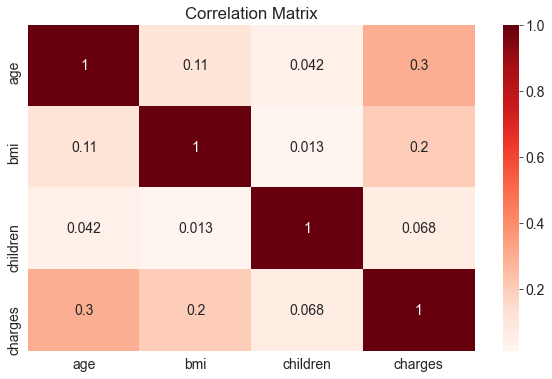

In [33]:
sns.heatmap(medical_df.corr(),cmap='Reds',annot=True)
plt.title('Correlation Matrix');

# Linear Regression using a Single Feature

In [34]:
non_smoker_df=medical_df[medical_df.smoker=='no']

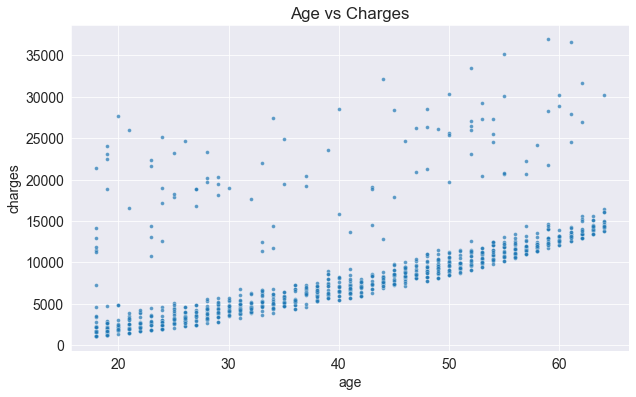

In [35]:
plt.title('Age vs Charges')
sns.scatterplot(x='age',y='charges',data=non_smoker_df,alpha=0.7,s=15);

## Model

In [36]:
def estimate_charges(age,w,b):
    return w*age+b

In [37]:
w=50
b=100

In [39]:
estimate_charges(40,w,b)

2100

In [41]:
ages=non_smoker_df.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [42]:
estimated_charges=estimate_charges(ages,w,b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [43]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

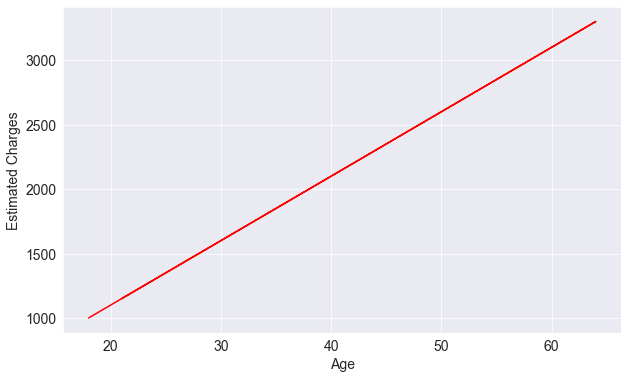

In [47]:
plt.plot(ages,estimated_charges,c='r');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

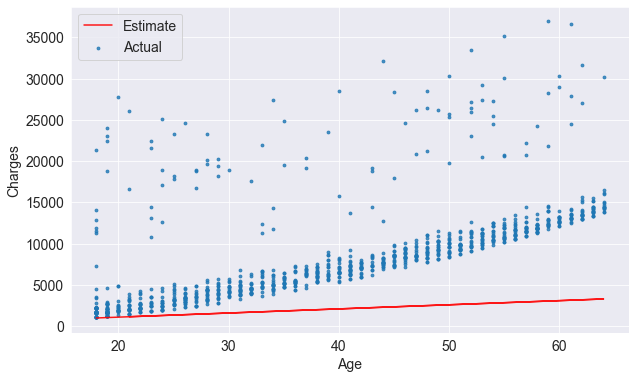

In [49]:
target=non_smoker_df.charges
plt.plot(ages,estimated_charges,'r',alpha=0.9);

plt.scatter(ages,target,s=8,alpha=0.8);

plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate','Actual']);

In [52]:
def try_parameters(w,b):
    ages=non_smoker_df.age 
    target=non_smoker_df.charges

    estimated_charges=estimate_charges(ages,w,b)

    plt.plot(ages,estimated_charges,'r',alpha=0.9);
    plt.scatter(ages,target,s=8,alpha=0.8);
    plt.xlabel('Ages');
    plt.ylabel('Charges')
    plt.legend(['Estimate','Actual']);

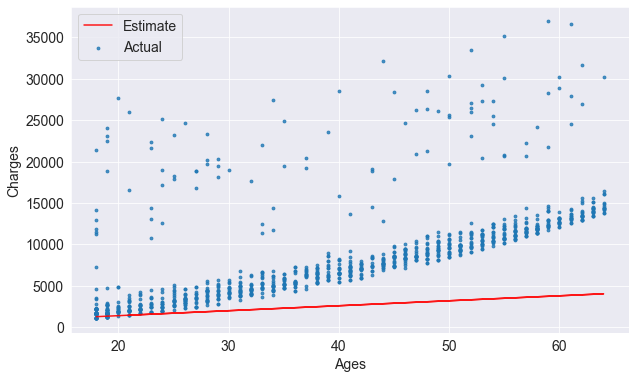

In [53]:
try_parameters(60,200)

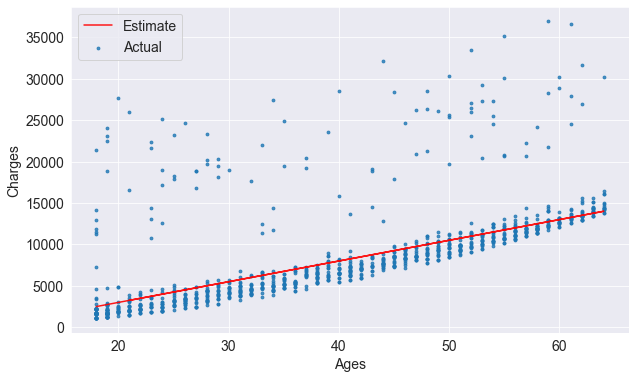

In [61]:
try_parameters(250,-2000)

In [62]:
import numpy as np 

In [69]:
def rmse(targets,predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

In [64]:
w=50
b=100

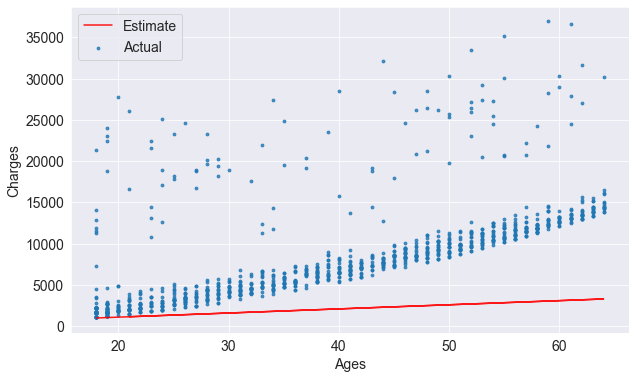

In [65]:
try_parameters(w,b)

In [71]:
targets=non_smoker_df['charges']
predicted=estimate_charges(non_smoker_df.age,w,b)

In [72]:
rmse(targets,predicted)

4705.696807404536

In [75]:
def try_parameters(w,b):
    ages=non_smoker_df.age 
    target=non_smoker_df.charges
    predictions=estimate_charges(ages,w,b)

    estimated_charges=estimate_charges(ages,w,b)

    plt.plot(ages,estimated_charges,'r',alpha=0.9);
    plt.scatter(ages,target,s=8,alpha=0.8);
    plt.xlabel('Ages');
    plt.ylabel('Charges')
    plt.legend(['Estimate','Actual']);

    loss=rmse(target,predictions)

    print('RMSE Loss :',loss)


RMSE Loss : 4808.139117283532


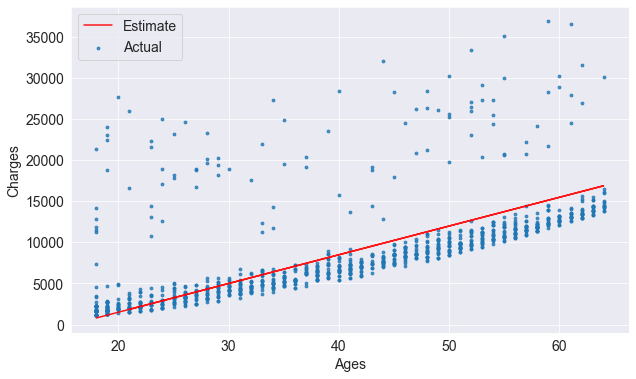

In [96]:
try_parameters(350,-5500)

## Linear Regression using Scikit-learn

In [98]:
!pip install scikit-learn --quiet

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
model=LinearRegression()

In [101]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : returns an instance of self.



In [102]:
inputs=non_smoker_df[['age']]
targets=non_smoker_df.charges
print('input.shape:',inputs.shape)
print('targets.shape:',targets.shape)

input.shape: (1064, 1)
targets.shape: (1064,)


In [104]:
model.fit(inputs,targets)

LinearRegression()

In [105]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [106]:
predictions=model.predict(inputs)

In [107]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [108]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [109]:
rmse(targets,predictions)

4662.505766636392

In [110]:
# w
model.coef_

array([267.24891283])

In [111]:
#b
model.intercept_

-2091.420556565079

RMSE Loss : 4662.505766636392


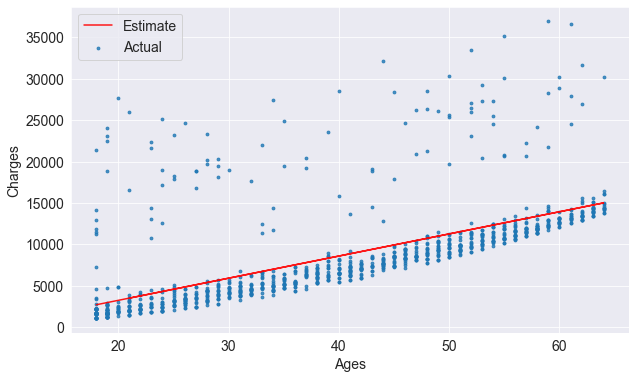

In [112]:
try_parameters(model.coef_,model.intercept_)

## USE SGDRegressor

##  Excersice compute for Smokers